In [1]:
from datascience import *
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
patients = Table.read_table('data/breast-cancer.csv').drop('ID')

def randomize_column(a):
    return a + np.random.normal(0.0, 0.09, size=len(a))

jittered = Table().with_columns([
        'Bland Chromatin (jittered)', 
        randomize_column(patients.column('Bland Chromatin')),
        'Single Epithelial Cell Size (jittered)', 
        randomize_column(patients.column('Single Epithelial Cell Size')),
        'Class',
        patients.column('Class')
    ])

# Google Science Fair

In [3]:
patients = Table.read_table('data/breast-cancer.csv').drop('ID')
patients.show(5)

In [4]:
patients.group('Class')

Class | count
0     | 444
1     | 239

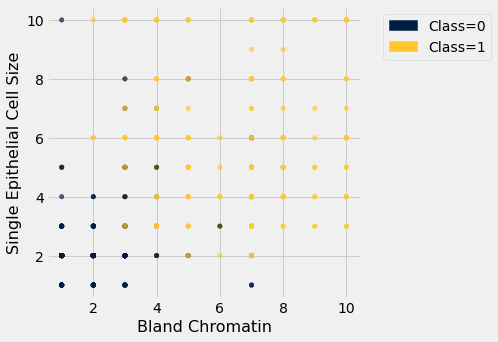

In [7]:
patients.scatter('Bland Chromatin', 'Single Epithelial Cell Size', group='Class')

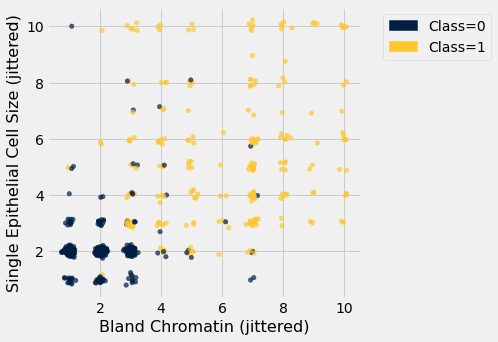

In [8]:
jittered.scatter(0, 1, group='Class')

## Distance ##

The following functions compute the distances between two points / rows in a table. `distance` takes in arrays, while `row_distance` will take in a row of a table (assuming it contains only numerical values) and convert them to arrays before passing them over to the `distance` function. As a result, you need to define both functions, since the second one depends on the first one.

In [9]:
def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

In [10]:
def row_distance(row1, row2):
    """Return the distance between two numerical rows of a table"""
    return distance(np.array(row1), np.array(row2))

`attributes` is the sample data, but without the column `Class` which specifies which class the cells belong to:

In [11]:
attributes = patients.drop('Class')
attributes.show(3)

In [12]:
row_distance(attributes.row(0), attributes.row(1))

11.874342087037917

In [13]:
row_distance(attributes.row(0), attributes.row(2))

2.23606797749979

In [14]:
row_distance(attributes.row(2), attributes.row(2))

0.0

# The Classifier

The `distances` function takes in training data as a table and an example provided as a row object.

In [15]:
def distances(training, example):
    """
    Compute distance between example and every row in training.
    Return training augmented with Distance column
    """
    distances = make_array()
    attributes_only = training.drop('Class')
    
    for row in attributes_only.rows:
        distances = np.append(distances, row_distance(row, example))
    
#   ^ SAME AS DOING:
#
#   for i in np.arange(attributes_only.num_rows):
#       row = attributes_only.row(i)
#       distances = np.append(distances, row_distance(row, example))
        
    return training.with_column('Distance_to_ex', distances)

In [16]:
example = attributes.row(21)
example

Row(Clump Thickness=10, Uniformity of Cell Size=5, Uniformity of Cell Shape=5, Marginal Adhesion=3, Single Epithelial Cell Size=6, Bare Nuclei=7, Bland Chromatin=7, Normal Nucleoli=10, Mitoses=1)

In [17]:
distances(patients.exclude(21), example)

Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses | Class | Distance_to_ex
5               | 1                       | 1                        | 1                 | 2                           | 1           | 3               | 1               | 1       | 0     | 14.4914
5               | 4                       | 4                        | 5                 | 7                           | 10          | 3               | 2               | 1       | 0     | 11
3               | 1                       | 1                        | 1                 | 2                           | 2           | 3               | 1               | 1       | 0     | 14.9332
6               | 8                       | 8                        | 1                 | 3                           | 4           | 3               | 7               | 1       | 0     | 9
4               | 1                       | 1                        | 3                 | 2                           | 1           | 3               | 1               | 1       | 0     | 14.7309
8               | 10                      | 10                       | 8                 | 7                           | 10          | 9               | 7               | 1       | 1     | 10.0995
1               | 1                       | 1                        | 1                 | 2                           | 10          | 3               | 1               | 1       | 0     | 15.4596
2               | 1                       | 2                        | 1                 | 2                           | 1           | 3               | 1               | 1       | 0     | 15.5563
2               | 1                       | 1                        | 1                 | 2                           | 1           | 1               | 1               | 5       | 0     | 16.8819
4               | 2                       | 1                        | 1                 | 2                           | 1           | 2               | 1               | 1       | 0     | 14.9332
... (672 rows omitted)

In [18]:
distances(patients.exclude(21), example).sort('Distance_to_ex')

Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses | Class | Distance_to_ex
8               | 4                       | 4                        | 5                 | 4                           | 7           | 7               | 8               | 2       | 0     | 4.3589
10              | 5                       | 7                        | 4                 | 4                           | 10          | 8               | 9               | 1       | 1     | 4.47214
7               | 4                       | 4                        | 3                 | 4                           | 10          | 6               | 9               | 1       | 1     | 5.09902
10              | 3                       | 6                        | 2                 | 3                           | 5           | 4               | 10              | 2       | 1     | 5.38516
10              | 5                       | 5                        | 6                 | 3                           | 10          | 7               | 9               | 2       | 1     | 5.38516
10              | 6                       | 6                        | 2                 | 4                           | 10          | 9               | 7               | 1       | 1     | 5.38516
9               | 7                       | 7                        | 5                 | 5                           | 10          | 7               | 8               | 3       | 1     | 5.56776
10              | 6                       | 4                        | 3                 | 10                          | 10          | 9               | 10              | 1       | 1     | 5.56776
8               | 7                       | 4                        | 4                 | 5                           | 3           | 5               | 10              | 1       | 1     | 5.56776
10              | 7                       | 7                        | 4                 | 5                           | 10          | 5               | 7               | 2       | 1     | 5.74456
... (672 rows omitted)

In [19]:
distances(patients.exclude(21), example).sort('Distance_to_ex').take(np.arange(5))

Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses | Class | Distance_to_ex
8               | 4                       | 4                        | 5                 | 4                           | 7           | 7               | 8               | 2       | 0     | 4.3589
10              | 5                       | 7                        | 4                 | 4                           | 10          | 8               | 9               | 1       | 1     | 4.47214
7               | 4                       | 4                        | 3                 | 4                           | 10          | 6               | 9               | 1       | 1     | 5.09902
10              | 3                       | 6                        | 2                 | 3                           | 5           | 4               | 10              | 2       | 1     | 5.38516
10              | 5                       | 5                        | 6                 | 3                           | 10          | 7               | 9               | 2       | 1     | 5.38516

In [20]:
def closest(training, example, k):
    """
    Return a table of the k closest neighbors to example
    """
    return distances(training, example).sort('Distance_to_ex').take(np.arange(k))

In [25]:
closest(patients.exclude(21), example, 5)

Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses | Class | Distance_to_ex
8               | 4                       | 4                        | 5                 | 4                           | 7           | 7               | 8               | 2       | 0     | 4.3589
10              | 5                       | 7                        | 4                 | 4                           | 10          | 8               | 9               | 1       | 1     | 4.47214
7               | 4                       | 4                        | 3                 | 4                           | 10          | 6               | 9               | 1       | 1     | 5.09902
10              | 3                       | 6                        | 2                 | 3                           | 5           | 4               | 10              | 2       | 1     | 5.38516
10              | 5                       | 5                        | 6                 | 3                           | 10          | 7               | 9               | 2       | 1     | 5.38516

In [26]:
closest(patients.exclude(21), example, 5).group('Class')

Class | count
0     | 1
1     | 4

In [27]:
closest(patients.exclude(21), example, 5).group('Class').sort('count', descending=True)

Class | count
1     | 4
0     | 1

In [28]:
closest(patients.exclude(21), example, 5).group('Class').sort('count', descending=True).column('Class')

array([1, 0])

In [29]:
closest(patients.exclude(21), example, 5).group('Class').sort('count', descending=True).column('Class').item(0)

1

In [30]:
def majority_class(topk):
    """
    Return the class with the highest count
    """
    return topk.group('Class').sort('count', descending=True).column('Class').item(0)

In [31]:
def classify(training, example, k):
    """
    Return the majority class among the 
    k nearest neighbors of example
    """
    return majority_class(closest(training, example, k))

In [32]:
classify(patients.exclude(21), example, 5)

1

In [33]:
patients.take(21)

Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses | Class
10              | 5                       | 5                        | 3                 | 6                           | 7           | 7               | 10              | 1       | 1

In [34]:
new_example = attributes.row(10)
classify(patients.exclude(10), new_example, 5)

0

In [35]:
patients.take(10)

Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses | Class
1               | 1                       | 1                        | 1                 | 1                           | 1           | 3               | 1               | 1       | 0

In [36]:
another_example = attributes.row(15)
classify(patients.exclude(15), another_example, 5)

0

In [37]:
patients.take(15)

Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses | Class
7               | 4                       | 6                        | 4                 | 6                           | 1           | 4               | 3               | 1       | 1

## Review of the Steps ##

- `distance(pt1, pt2)`: Returns the distance between the arrays `pt1` and `pt2`
- `row_distance(row1, row2)`: Returns the distance between the rows `row1` and `row2`
- `distances(training, example)`: Returns a table that is `training` with an additional column `'Distance'` that contains the distance between `example` and each row of `training`
- `closest(training, example, k)`: Returns a table of the rows corresponding to the k smallest distances 
- `majority_class(topk)`: Returns the majority class in the `'Class'` column
- `classify(training, example, k)`: Returns the predicted class of `example` based on a `k` nearest neighbors classifier using the historical sample `training`

## Accuracy of a Classifier ##

In [38]:
patients.num_rows

683

In [39]:
shuffled = patients.sample(with_replacement=False) # Randomly permute the rows
training_set = shuffled.take(np.arange(342))
test_set  = shuffled.take(np.arange(342, 683))

In [43]:
def evaluate_accuracy(training, test, k):
    """Return the proportion of correctly classified examples 
    in the test set"""
    test_attributes = test.drop('Class')
    num_correct = 0
    for i in np.arange(test.num_rows):
        c = classify(training, test_attributes.row(i), k)
        num_correct = num_correct + (c == test.column('Class').item(i))
    return num_correct / test.num_rows

In [44]:
evaluate_accuracy(training_set, test_set, 5)

0.9736070381231672

In [45]:
evaluate_accuracy(training_set, test_set, 3)

0.967741935483871

In [46]:
evaluate_accuracy(training_set, test_set, 11)

0.9736070381231672

In [47]:
evaluate_accuracy(training_set, test_set, 1)

0.9560117302052786

# Standardize if Necessary

In [ ]:
def standard_units(x):
    return (x - np.average(x)) / np.std(x)

In [ ]:
ckd = Table.read_table('data/ckd.csv')
ckd = ckd.relabeled('Blood Glucose Random', 'Glucose').select('Glucose', 'Hemoglobin', 'White Blood Cell Count', 'Class')

In [ ]:
ckd_new = ckd.select('Class').with_columns(
    'Glucose_su', standard_units(ckd.column('Glucose')),
    'Hemoglobin_su', standard_units(ckd.column('Hemoglobin')),
    'WBC_su', standard_units(ckd.column('White Blood Cell Count'))
)

In [ ]:
ckd_new

In [ ]:
shuffled = ckd_new.sample(with_replacement=False) 
training_set = shuffled.take(np.arange(74))
test_set  = shuffled.take(np.arange(74, 148))

In [ ]:
evaluate_accuracy(training_set, test_set, 3)

In [ ]:
shuffled = ckd.sample(with_replacement=False) 
training_set = shuffled.take(np.arange(74))
test_set  = shuffled.take(np.arange(74, 148))

In [ ]:
evaluate_accuracy(training_set, test_set, 3)